# 3. RS CVn Stars Spectral Energy Distributions

## 3.1. Notebook setup

In [23]:
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 3.2. <a href="https://www.dropbox.com/sh/hkkdw1pdpt76kfb/AACVh44utUvSsedKgkMG8UeJa?dl=0">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HR1099_data.txt
│   ├── HR1099_I_models.txt
│   ├── HR1099_V_models.txt
│   ├── model_sed_freqs.txt
│   ├── thermal-gs.mplstyle
│   ├── UXArietis_data.txt
│   ├── UXArietis_I_models.txt
│   ├── UXArietis_V_models.txt
│   ├── ...
├── figures
│   ├── HR1099_SED.pdf
│   ├── HR1099_SED.png
│   ├── UXArietis_SED.pdf
│   ├── UXArietis_SED.png
│   ├── ...
├── notebooks
│   ├── rs-cvn_seds.ipynb
│   ├── ...
.
.
.

## 3.3. Load

In [24]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
HR_I_models = np.loadtxt('../data/HR1099_I_models.txt')
HR_V_models = np.loadtxt('../data/HR1099_V_models.txt')
freqs_obs, HR_I_obs, HR_sI_obs, HR_V_obs, HR_sV_obs = np.loadtxt('../data/HR1099_data.txt', unpack=True)

UX_I_models = np.loadtxt('../data/UXArietis_I_models.txt')
UX_V_models = np.loadtxt('../data/UXArietis_V_models.txt')
freqs_obs, UX_I_obs, UX_sI_obs, UX_V_obs, UX_sV_obs = np.loadtxt('../data/UXArietis_data.txt', unpack=True)

plt.style.use('../data/thermal-gs.mplstyle')

### 3.4. Plot

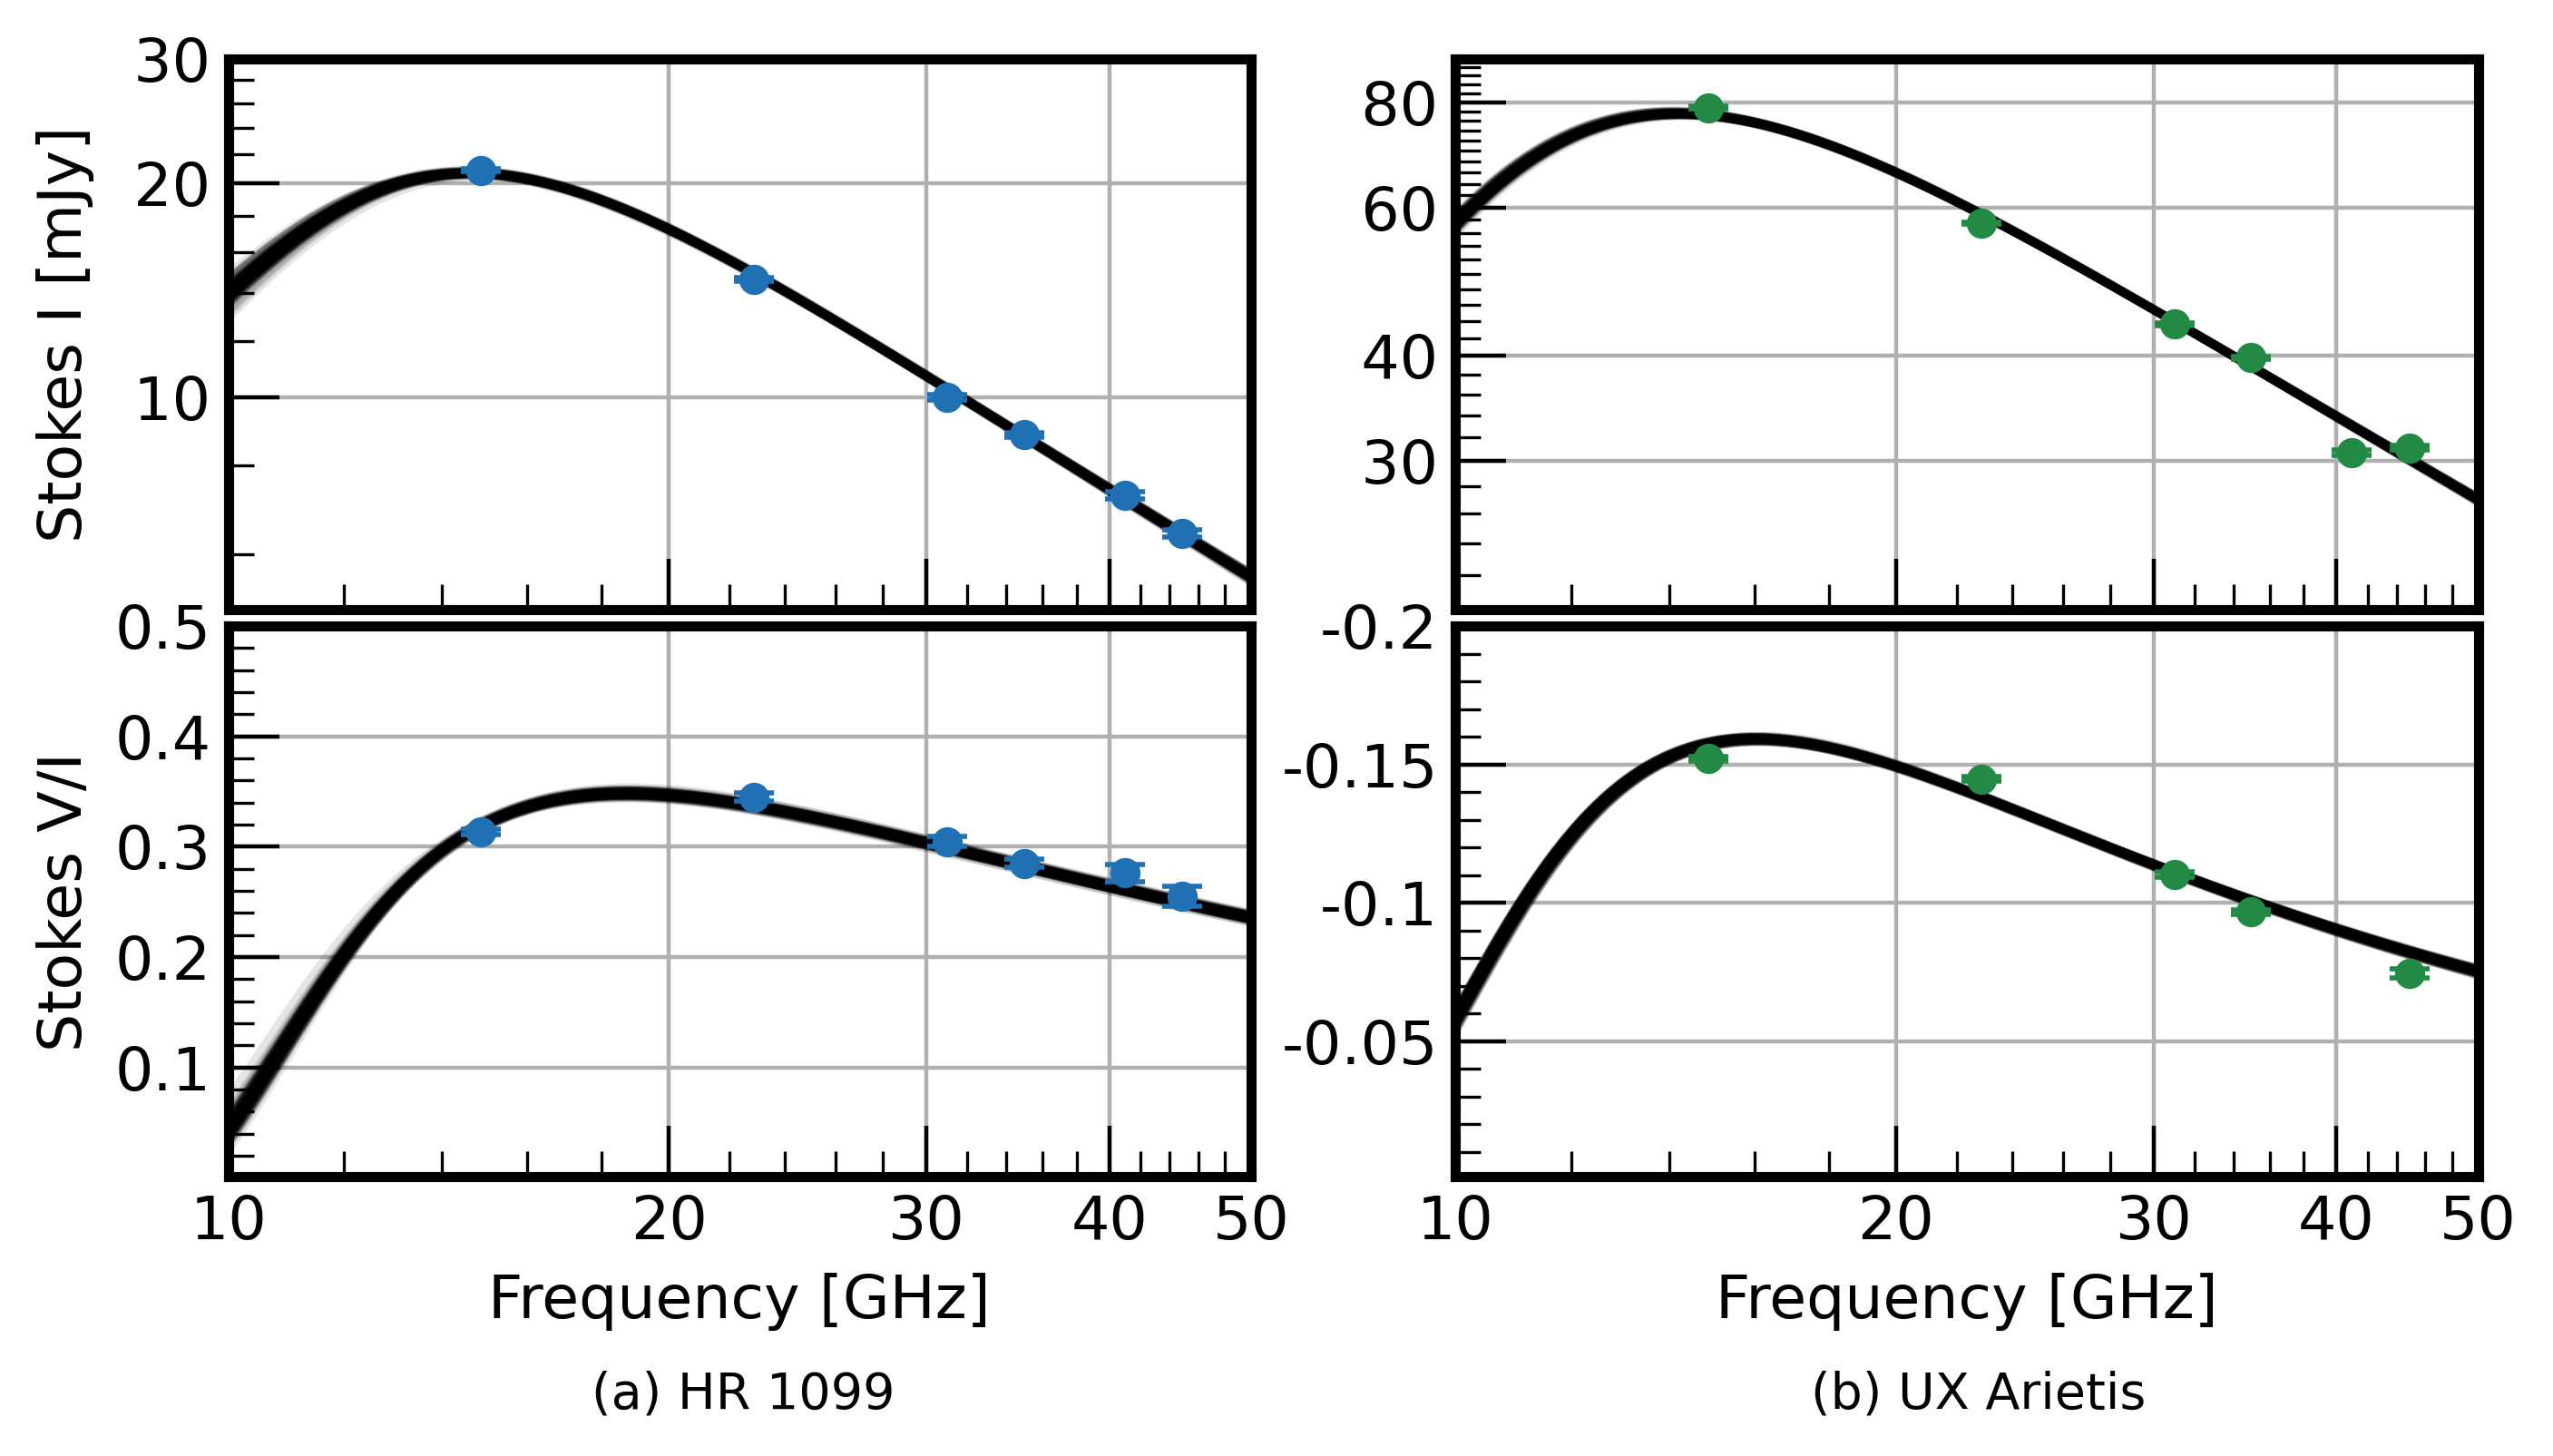

In [25]:
fig,ax = plt.subplots(2, 2, figsize=(8, 4), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.2)

# HR 1099
cmap = mpl.cm.get_cmap('Blues')

# Stokes I  
ax[0][0].set_ylabel('Stokes I [mJy]')
ax[0][0].set_xlim(10, 50)
ax[0][0].set_ylim(5.01, 30)

ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0][0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0][0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0][0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0][0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=3, subs=[1, 2, 3, 4, 5]))
ax[0][0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=15, subs=np.arange(1, 15)*0.2))
ax[0][0].grid()

for i in range(len(HR_I_models)):
    ax[0][0].plot(freqs_model, HR_I_models[i], color='black', alpha=0.1)
ax[0][0].errorbar(freqs_obs, HR_I_obs, yerr=HR_sI_obs, color=cmap(0.75), marker='o', linestyle='')

# Stokes V/I
ax[1][0].set_xlabel('Frequency [GHz]')
ax[1][0].set_ylabel('Stokes V/I')
ax[1][0].set_ylim(0.001, 0.5)

ax[1][0].set_xscale('log')
ax[1][0].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1][0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1][0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1][0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1][0].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1][0].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1][0].grid()

for i in range(len(HR_V_models)):
    ax[1][0].plot(freqs_model, HR_V_models[i]/HR_I_models[i], color='black', alpha=0.1)
ax[1][0].errorbar(freqs_obs, HR_V_obs/HR_I_obs, yerr=np.sqrt((HR_sI_obs/HR_I_obs)**2+(HR_sV_obs/HR_V_obs)**2)*np.abs(HR_V_obs/HR_I_obs), 
    color=cmap(0.75), marker='o', linestyle='')

# UX Arietis
cmap = mpl.cm.get_cmap('Greens')

# Stokes I  
ax[0][1].set_xlim(10, 50)
ax[0][1].set_ylim(20.01, 90)

ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0][1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0][1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0][1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0][1].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 3, 4, 6, 8]))
ax[0][1].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=43, subs=np.arange(2, 45)*0.2))
ax[0][1].grid()

for i in range(len(UX_I_models)):
    ax[0][1].plot(freqs_model, UX_I_models[i], color='black', alpha=0.1)
ax[0][1].errorbar(freqs_obs, UX_I_obs, yerr=UX_sI_obs, color=cmap(0.75), marker='o', linestyle='')

# Stokes V/I
ax[1][1].set_xlabel('Frequency [GHz]')
ax[1][1].set_ylim(-0.001, -0.2)

ax[1][1].set_xscale('log')
ax[1][1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1][1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1][1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1][1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1][1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax[1][1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
ax[1][1].grid()

for i in range(len(UX_V_models)):
    ax[1][1].plot(freqs_model, UX_V_models[i]/UX_I_models[i], color='black', alpha=0.1)
ax[1][1].errorbar(freqs_obs, UX_V_obs/UX_I_obs, yerr=np.sqrt((UX_sI_obs/UX_I_obs)**2+(UX_sV_obs/UX_V_obs)**2)*np.abs(UX_V_obs/UX_I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# Final setup
fig.text(0.25, -0.05, '(a) HR 1099', fontsize=10) 
fig.text(0.67, -0.05, '(b) UX Arietis', fontsize=10) 
fig.set_facecolor('white')
plt.savefig('../figures/rs-cvn_seds.png', bbox_inches='tight')
plt.savefig('../figures/rs-cvn_seds.pdf', bbox_inches='tight')
plt.show()